### comparison of composition of microbes between spring and fall
---

In [1]:
#setworking directory to AbioticAraMicrobe/
setwd('../')

In [14]:
# load packages
library(vegan)
library(ggplot2)
library(reshape2)
library(ggpubr)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




### Bacteria
---

[1] 15

Using Order as id variables



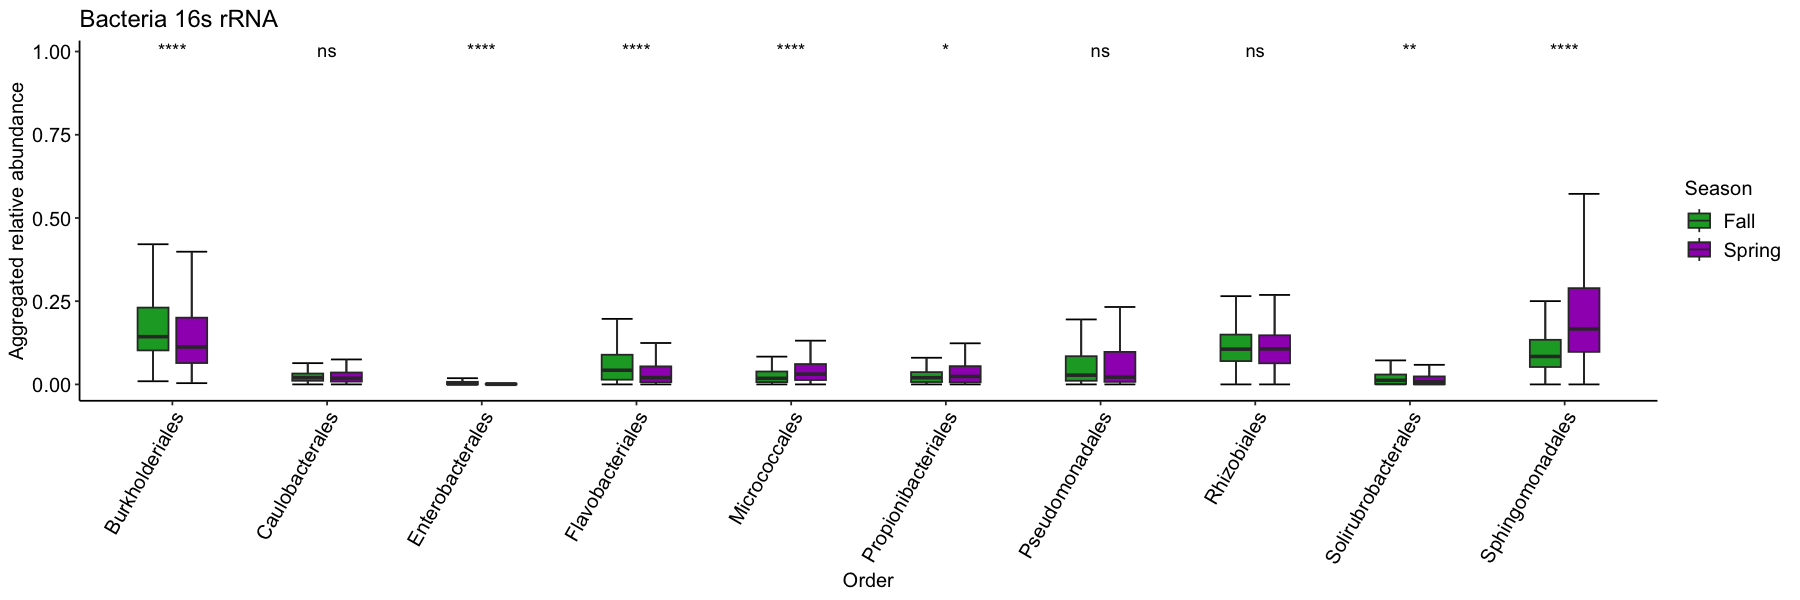

In [7]:
#open otu and taxa table
Otu1 = read.table("data/DataClean/BV5Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
Taxa = read.table("data/DataClean/BV5Taxa.txt", header = T , check.names = F , stringsAsFactors = F)
Taxa = Taxa[-c(2,3)]
firstotuname = "Otu000002"
n <- which(colnames(Otu1)==firstotuname)
n
sam_otu1 = Otu1[-c(1:n-1)]

#make phyloseq input files
#sample
sample = Otu1[c(1:n-1)]
sam_otuRA <- decostand(sam_otu1, method="total", MARGIN=1)   ###Relative abundance
otu_mat = t(sam_otuRA)
otu_mat = merge(x = Taxa[c("OTU","Order")] , y =otu_mat  , by.x = "OTU" , by.y = "row.names")

otu_mat = otu_mat[-c(1)]

otu_matorder_agg = aggregate(. ~  Order, data = otu_mat , sum)
otu_matorder_agg1 = melt(otu_matorder_agg)
colnames(otu_matorder_agg1) =  c("Order","Sample","RelativeAbundance")
sum_order = aggregate(. ~  Order, data = otu_matorder_agg1[c(1,3)] , sum)
sum_order = sum_order[sum_order$RelativeAbundance>1.214643e+01,] #top 10 high abundance taxa
otu_matorder_agg1 = merge(x = sample[c("Samplenumber" , "Season")] , y = otu_matorder_agg1 , by.x="row.names" , by.y = "Sample")
data1 = otu_matorder_agg1[otu_matorder_agg1$Order %in% sum_order$Order,]
col1 = c("#a00fbd","#17a62d")
pd = position_dodge(width = 0.5)

p1 <- ggplot(data1 , aes(x = Order , y = RelativeAbundance , fill = Season))  +  
  stat_boxplot(geom="errorbar", position=pd, width=0.4) +
  geom_boxplot(width=0.4, position=pd , outlier.shape=NA) + 
  theme_classic() + theme(
    text = element_text(size = 12 , colour = "black"),
    axis.text = element_text(size = 12 , colour = "black" ),
    axis.title = element_text(size = 12 , colour = "black" ),
    strip.text = element_text(size = 12 , colour = "black" ),
    axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 12),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    axis.line = element_line(colour = "black") ,
    legend.title = element_text(color = "black", size = 12),
    legend.text = element_text(color = "black", size = 12) ,
    strip.background = element_rect(colour = "black", fill = "white"))+ 
  stat_compare_means(aes(label = after_stat(p.signif)), method = "wilcox.test") +
  labs(title="Bacteria 16s rRNA", y = "Aggregated relative abundance") +  scale_fill_manual(values=rev(col1)) 

options(repr.plot.width=15, repr.plot.height=5)
p1

---
### Fungi

[1] 15

Using Order as id variables



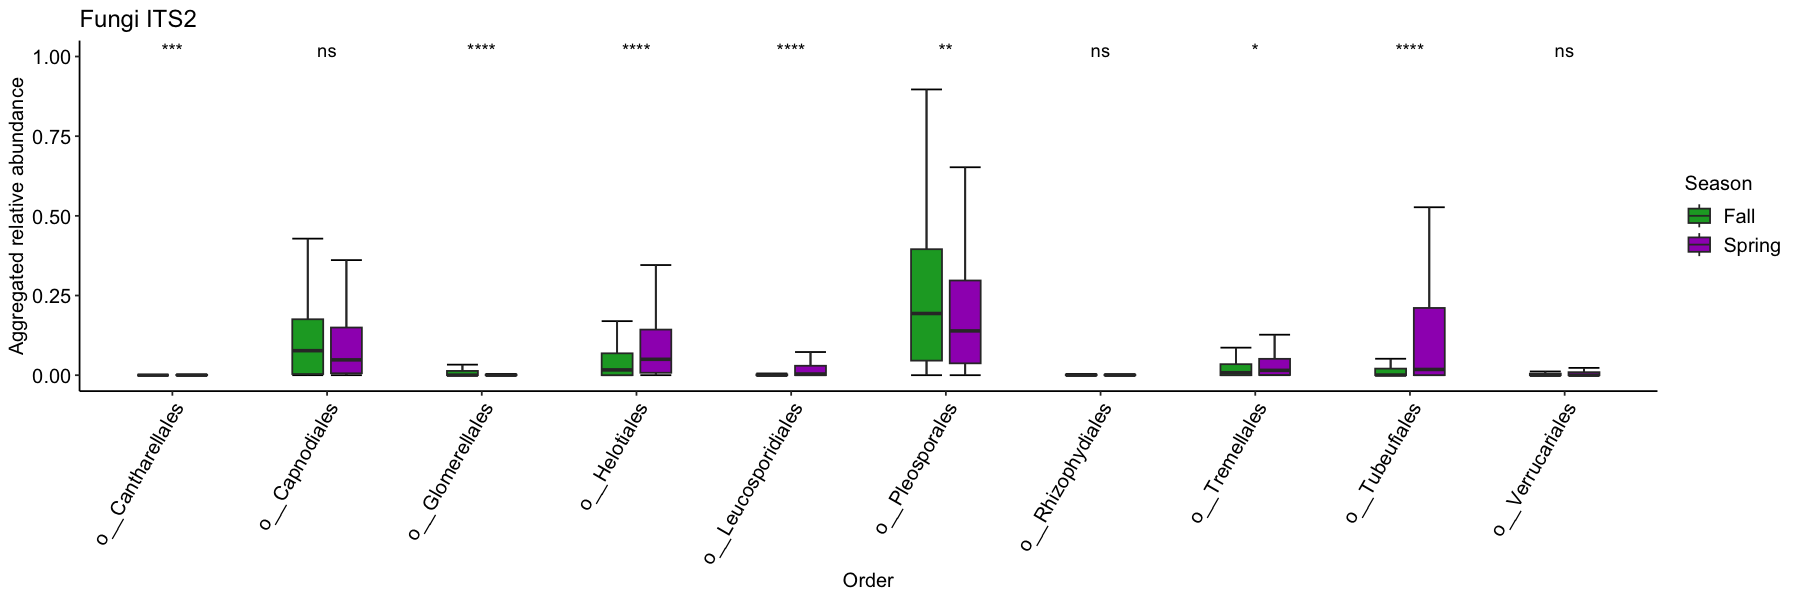

In [16]:
#open otu and taxa table
Otu1 = read.table("data/DataClean/FITS2Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
Taxa = read.table("data/DataClean/FITS2Taxa.txt", header = T , check.names = F , stringsAsFactors = F)
Taxa = Taxa[-c(2,3)]
firstotuname = "Otu00002"
n <- which(colnames(Otu1)==firstotuname)
n
sam_otu1 = Otu1[-c(1:n-1)]

sam_otuRA <- decostand(sam_otu1, method="total", MARGIN=1)   ###Relative abundance
otu_mat = t(sam_otuRA)
otu_mat = merge(x = Taxa[c("OTU","Order")] , y =otu_mat  , by.x = "OTU" , by.y = "row.names")

otu_mat = otu_mat[-c(1)]

otu_matorder_agg = aggregate(. ~  Order, data = otu_mat , sum)
otu_matorder_agg1 = melt(otu_matorder_agg)
colnames(otu_matorder_agg1) =  c("Order","Sample","RelativeAbundance")
sum_order = aggregate(. ~  Order, data = otu_matorder_agg1[c(1,3)] , sum)
sum_order = sum_order[sum_order$RelativeAbundance>1.600236e+01,] #top 10 high abundance taxa
otu_matorder_agg1 = merge(x = sample[c("Samplenumber" , "Season")] , y = otu_matorder_agg1 , by.x="row.names" , by.y = "Sample")
data1 = otu_matorder_agg1[otu_matorder_agg1$Order %in% sum_order$Order,]
col1 = c("#a00fbd","#17a62d")
pd = position_dodge(width = 0.5)

p2 <- ggplot(data1 , aes(x = Order , y = RelativeAbundance , fill = Season))  +  
  stat_boxplot(geom="errorbar", position=pd, width=0.4) +
  geom_boxplot(width=0.4, position=pd , outlier.shape=NA) + 
  theme_classic() + theme(
    text = element_text(size = 12 , colour = "black"),
    axis.text = element_text(size = 12 , colour = "black" ),
    axis.title = element_text(size = 12 , colour = "black" ),
    strip.text = element_text(size = 12 , colour = "black" ),
    axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 12),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    axis.line = element_line(colour = "black") ,
    legend.title = element_text(color = "black", size = 12),
    legend.text = element_text(color = "black", size = 12) ,
    strip.background = element_rect(colour = "black", fill = "white"))+ 
  stat_compare_means(label = "p.signif", method = "wilcox.test") +
  labs(title="Fungi ITS2", y = "Aggregated relative abundance") +  scale_fill_manual(values=rev(col1)) 

options(repr.plot.width=15, repr.plot.height=5)
p2

In [43]:
library(dplyr)
df = data1[data1$Order=='o__Cantharellales',]
df %>%
  group_by(Season) %>%
  summarise_at(vars(RelativeAbundance), list(name = mean))

Season,name
<chr>,<dbl>
Fall,0.007412569
Spring,0.035854970


---
### Eukaryotes
---

[1] 15

Using Order as id variables



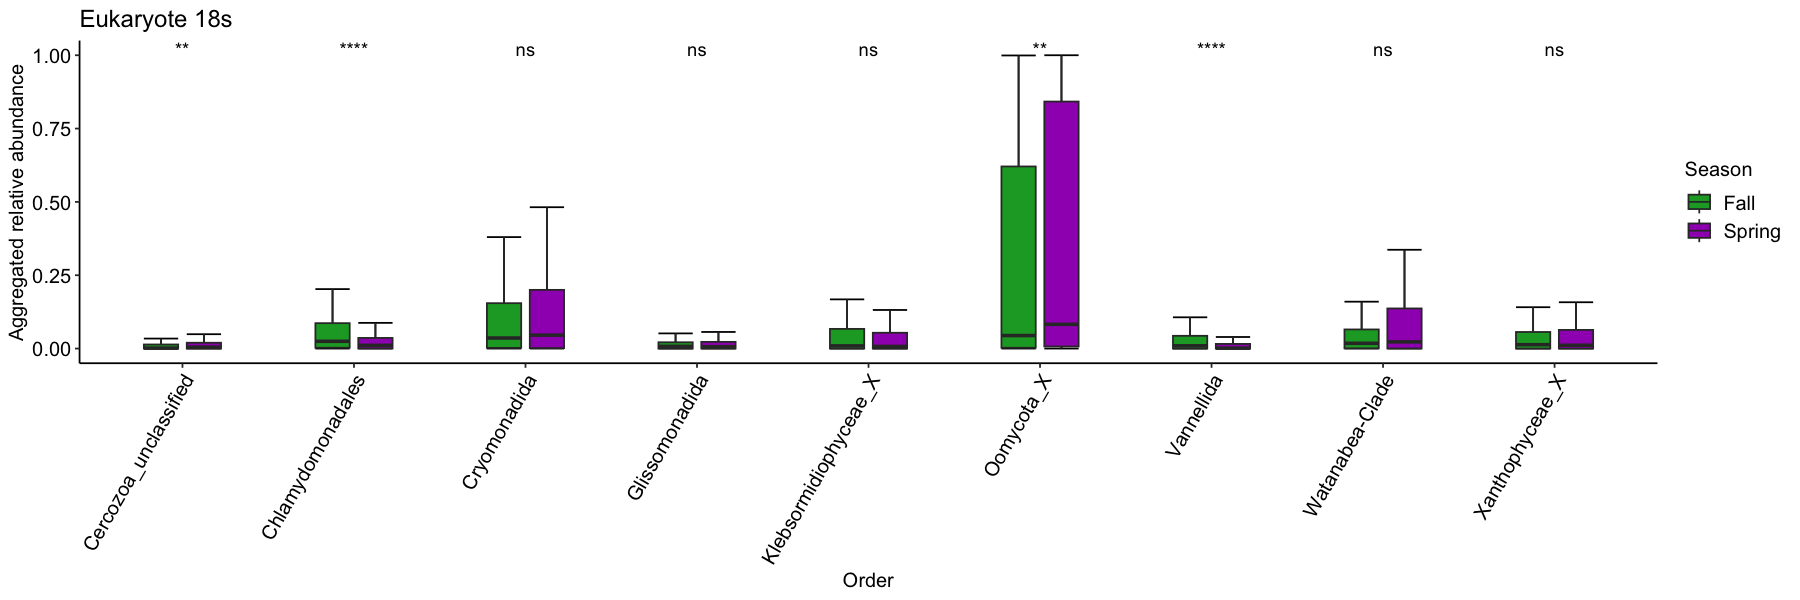

In [10]:
#open otu and taxa table
Otu1 = read.table("data/DataClean/PV9Otu.txt", header = T , check.names = F , stringsAsFactors = F)
rownames(Otu1) = Otu1$Samplenumber
Taxa = read.table("data/DataClean/PV9Taxa.txt", header = T , check.names = F , stringsAsFactors = F)
Taxa = Taxa[-c(2,3)]
firstotuname = "Otu00002"
n <- which(colnames(Otu1)==firstotuname)
n
sam_otu1 = Otu1[-c(1:n-1)]

#---------------------------------------------------------------------------------------------
sam_otuRA <- decostand(sam_otu1, method="total", MARGIN=1)   ###Relative abundance
otu_mat = t(sam_otuRA)
otu_mat = merge(x = Taxa[c("OTU","Order")] , y =otu_mat  , by.x = "OTU" , by.y = "row.names")

otu_mat = otu_mat[-c(1)]

otu_matorder_agg = aggregate(. ~  Order, data = otu_mat , sum)
otu_matorder_agg1 = melt(otu_matorder_agg)
colnames(otu_matorder_agg1) =  c("Order","Sample","RelativeAbundance")
sum_order = aggregate(. ~  Order, data = otu_matorder_agg1[c(1,3)] , sum)
sum_order = sum_order[sum_order$RelativeAbundance>1.055062e+01,] #top 10 high abundance taxa
otu_matorder_agg1 = merge(x = sample[c("Samplenumber" , "Season")] , y = otu_matorder_agg1 , by.x="row.names" , by.y = "Sample")
data1 = otu_matorder_agg1[otu_matorder_agg1$Order %in% sum_order$Order,]
col1 = c("#a00fbd","#17a62d")
pd = position_dodge(width = 0.5)

p3 <- ggplot(data1 , aes(x = Order , y = RelativeAbundance , fill = Season))  +  
  stat_boxplot(geom="errorbar", position=pd, width=0.4) +
  geom_boxplot(width=0.4, position=pd , outlier.shape=NA) + 
  theme_classic() + theme(
    text = element_text(size = 12 , colour = "black"),
    axis.text = element_text(size = 12 , colour = "black" ),
    axis.title = element_text(size = 12 , colour = "black" ),
    strip.text = element_text(size = 12 , colour = "black" ),
    axis.text.x = element_text(angle = 60, hjust = 1 , colour="black", size = 12),
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(), 
    axis.line = element_line(colour = "black") ,
    legend.title = element_text(color = "black", size = 12),
    legend.text = element_text(color = "black", size = 12) ,
    strip.background = element_rect(colour = "black", fill = "white"))+ 
  stat_compare_means(label = "p.signif", method = "wilcox.test") +
  labs(title="Eukaryote 18s", y = "Aggregated relative abundance")  +  scale_fill_manual(values=rev(col1)) 


options(repr.plot.width=15, repr.plot.height=5)
p3

In [15]:
ggsave("plots/ComposionalDifferences_boxplot.pdf" ,  plot_grid(p1,p2,p3, nrow = 1, ncol = 3 , align = "hv"), width = 20 , height = 6 , useDingbats = F)